# Laboratorul 5

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [35]:
import numpy as np
import matplotlib.pyplot as plt

## Exercițiul 1

Prespuneți că într-o incintă temperatura este controlată astfel încât să se obțină o periodicitate noapte-zi asemănătoare unei sinusoide; maximul de temperatură ($1^{\circ} \text{C}$) se atinge la ora 12:00, minimul ($-1^{\circ} \text{C}$) la ora 24:00, nu există variații între zile. Începeți să măsurați temperatura din incintă într-o zi de miercuri, la ora 12:00.

a) Dacă măsurați temperatura la fiecare 2 ore, care va fi **frecvența de eșantionare** (exprimată **în Hz**)?

In [34]:
ore = 24
interval_ore = 2

frecventa_esantionare = 1 / (interval_ore * 3600)
print(f"Frecventa de esantionare pe 2 ore: {frecventa_esantionare:.6f} Hz")

Frecventa de esantionare pe 2 ore: 0.000139 Hz


b) Care este **perioada** semnalului de temperatură și care este **frecvența** acestuia? Este eșantionarea din subpunctul precedent **corectă** în sensul teoremei Nyquist? Care este intervalul de perioada maximă la care trebuie măsurată temperatura astfel încât să îndeplinească criteriul de eșantionare Nyquist?

In [33]:
perioada = ore
frecventa_semnal = 1 / (perioada * 3600)
frecventa_nyquist = 2 * frecventa_semnal
interval_esantionare_nyquist = 1 / (2 * frecventa_semnal) / 3600

print(f"Perioada semnalului: {perioada} ore")
print(f"Frecventa semnalului: {frecventa_semnal:.6f} Hz")
print(f"Intervalul Nyquist de esantionare: {interval_esantionare_nyquist:.2f} ore")

respecta_nyquist = (interval_ore <= interval_esantionare_nyquist)
print(f"Respecta criteriul Nyquist: {respecta_nyquist}")


Perioada semnalului: 24 ore
Frecventa semnalului: 0.000012 Hz
Intervalul Nyquist de esantionare: 12.00 ore
Respecta criteriul Nyquist: True


c) Afișați **grafic** cu o curbă sinusoida de temperatură pentru o săptămână și eșantioanele (semnalate grafic prin puncte) obținute cu frecvența de eșantionare de la punctul (a). Afișați conținutul variabilei în care rețineți axa timpului.

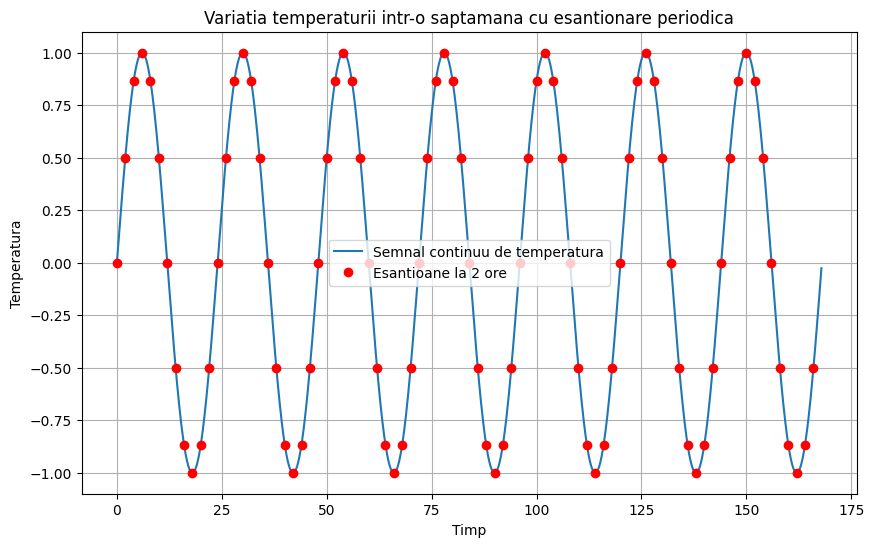

Esantioanele de timp (din 2 in 2 ore): [  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166]


In [32]:
ore = 24
interval_esantionare = 2
saptamana_ore = 7 * ore
perioada_semnal = ore

timp_ore = np.arange(0, saptamana_ore, 0.1)
semnal_temperatura = np.sin(2 * np.pi * timp_ore / perioada_semnal)

timp_esantioane = np.arange(0, saptamana_ore, interval_esantionare)
temperatura_esantioane = np.sin(2 * np.pi * timp_esantioane / perioada_semnal)

plt.figure(figsize=(10, 6))
plt.plot(timp_ore, semnal_temperatura, label="Semnal continuu de temperatura")
plt.plot(timp_esantioane, temperatura_esantioane, "ro", label=f"Esantioane la {interval_esantionare} ore")
plt.xlabel("Timp")
plt.ylabel("Temperatura")
plt.title("Variatia temperaturii intr-o saptamana cu esantionare periodica")
plt.legend()
plt.grid(True)
plt.show()
    
print(f"Esantioanele de timp (din {interval_esantionare} in {interval_esantionare} ore):", timp_esantioane)


d) Dacă măsurați temperatura **o dată la 5 ore**, în ce zi și la ce oră veți obține **din nou** valoarea din primul eșantion (cel de miercuri, ora 12:00)?

In [16]:
interval_esantionare = 5  # esantionare la 5 ore

timp_pana_la_repetitie = ore * interval_esantionare // np.gcd(ore, interval_esantionare)
zile_pana_la_repetitie = timp_pana_la_repetitie // ore
ora_pana_la_repetitie = timp_pana_la_repetitie % ore

print(f"Repetare cu esantionare odata la {interval_esantionare} ore: Ziua {zile_pana_la_repetitie}, Ora {ora_pana_la_repetitie}")

Repetare cu esantionare odata la 5 ore: Ziua 5, Ora 0


e) Generați eșantioanele pentru **noua perioadă de eșantionare** (5 ore). Afișați-le pe un nou grafic folosind funcția `plt.plot()`. Ce observați?

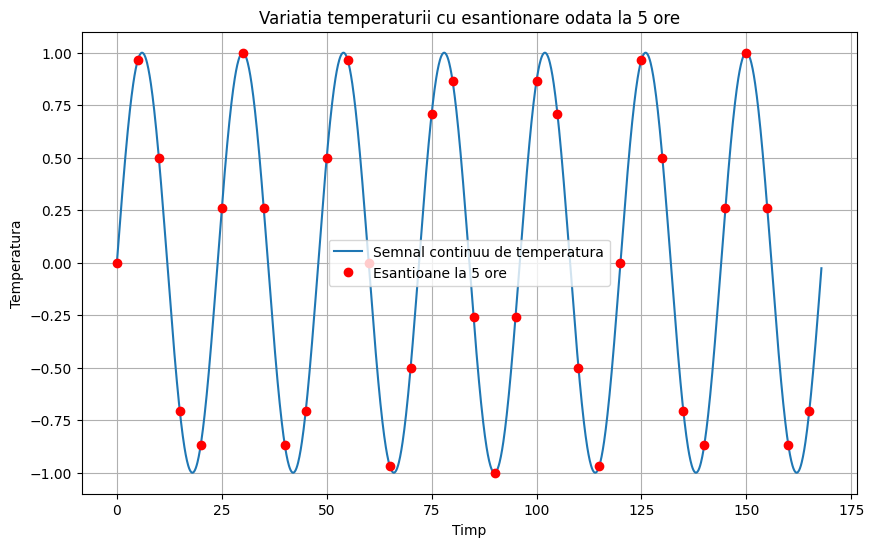

In [31]:
# Generare esantioane pentru noua perioada
timp_esantionat_5h = np.arange(0, saptamana_ore, interval_esantionare)
temperatura_esantionata_5h = np.sin(2 * np.pi * timp_esantionat_5h / perioada_semnal)

plt.figure(figsize=(10, 6))
plt.plot(timp_ore, semnal_temperatura, label="Semnal continuu de temperatura")
plt.plot(timp_esantionat_5h, temperatura_esantionata_5h, "ro", label=f"Esantioane la {interval_esantionare} ore")
plt.xlabel("Timp")
plt.ylabel("Temperatura")
plt.title("Variatia temperaturii cu esantionare odata la 5 ore")
plt.legend()
plt.grid(True)
plt.show()


f) Creați un nou grafic în care afișați eșantioanele generate la subpunctul precedent folosind, de data aceasta, `plt.stem()`. Adăugați pe acest grafic, cu alte culori, sinusoida și eșantioanele de la subpunctul (c).

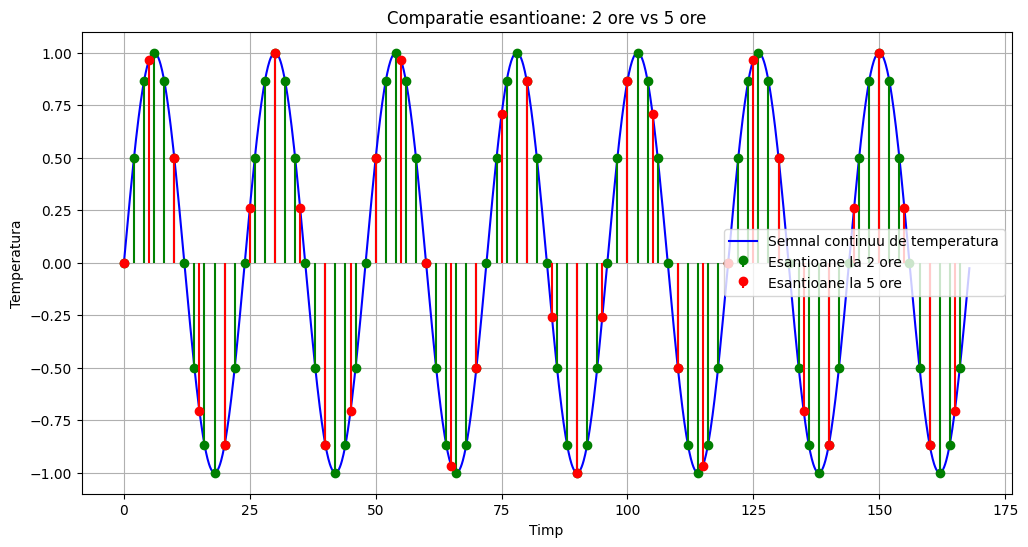

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(timp_ore, semnal_temperatura, 'b-', label='Semnal continuu de temperatura')
plt.stem(timp_esantioane, temperatura_esantioane, linefmt='g-', markerfmt='go', basefmt=" ", label='Esantioane la 2 ore')
plt.stem(timp_esantionat_5h, temperatura_esantionata_5h, linefmt='r-', markerfmt='ro', basefmt=" ", label='Esantioane la 5 ore')
plt.xlabel("Timp")
plt.ylabel("Temperatura")
plt.title("Comparatie esantioane: 2 ore vs 5 ore")
plt.legend()
plt.grid(True)
plt.show()


## Exercițiul 2

Generați și afișați grafic o sinusoidă de frecvență și fază aleasă de voi, dar ale cărei valori minime și maxime (atinse) să fie 3, respectiv 7.
     

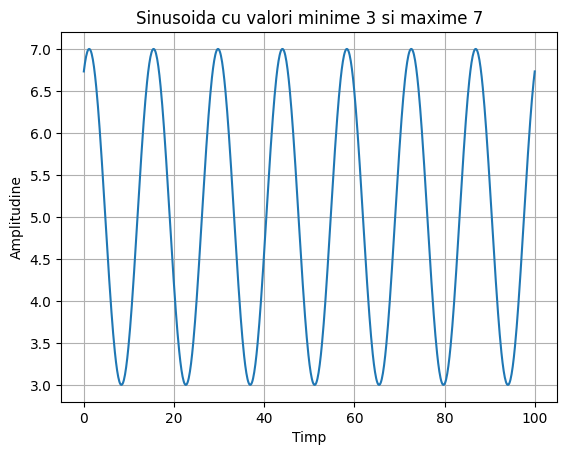

In [28]:
A = 2.0
frecventa = 0.07
faza = np.pi / 3
offset = 5.0

timp = np.linspace(0, 100, 800)
semnal = A * np.sin(2 * np.pi * frecventa * timp + faza) + offset

plt.plot(timp, semnal)
plt.xlabel("Timp")
plt.ylabel("Amplitudine")
plt.title("Sinusoida cu valori minime 3 si maxime 7")
plt.grid(True)
plt.show()


## Exercițiul 3

Calculați frecvența optimă (cea mai eficientă) de eșantionare sub-Nyquist pentru un semnal de bandă $B = 10 \, \text{Hz}$ centrat în jurul lui $f_c = 90 \, \text{Hz}$ pentru următoarele 3 valori posibile ale numărului de replici: a) m = 1, b) m = 2, c) m = 4.

In [26]:
# fs = (2*fc - B) / m
B = 10
fc = 90

def fs_opt(m):
    return (2*fc - B) / m

m_valori = [1, 2, 4]

for m in m_valori:
    fs = fs_opt(m)
    print(f"Pentru m = {m}, frecventa optima sub-Nyquist fs = {fs:.2f} Hz")

Pentru m = 1, frecventa optima sub-Nyquist fs = 170.00 Hz
Pentru m = 2, frecventa optima sub-Nyquist fs = 85.00 Hz
Pentru m = 4, frecventa optima sub-Nyquist fs = 42.50 Hz


## Exercițiul 4

Puterea unui semnal este $P_{semnal} = 90 \, \text{dB}$. Se cunoaște raportul semnal-zgomot, $\text{SNR}_{\text{dB}} = 80 \, \text{dB}$. Care este puterea zgomotului?

**Indicație:** deoarece nu știți puterea de referință față de care se măsoară aceste puteri în decibeli, ar trebui să găsiți răspunsul fără a face conversia în watts.

In [27]:
P_semnal_dB = 90
SNR_dB = 80

P_zgomot_dB = P_semnal_dB - SNR_dB
print(f"Puterea zgomotului: {P_zgomot_dB} dB")


Puterea zgomotului: 10 dB
